# **(Part 3. Building A Primary Model )**

## Objectives

* Kernelized support vector machines are powerful models and perform well on a variety of datasets. 
* Regularization parameter C, 
* The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
* Kernel-specific parameters. 

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Breast-Cancer-Prediction'

---

# Getting Started: Load libraries and set options

In [4]:
#load libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# For Train , Test Spliting 
from sklearn.model_selection import train_test_split

# For Building Classifier Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# For Evaluating the Accuray of the Classifiers 
from sklearn.metrics import classification_report , mean_squared_error , confusion_matrix
from sklearn import metrics

# For  Hyper parameter Tuning 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# For Cross Validation
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score, cross_val_predict

In [5]:
df = pd.read_csv("outputs/datasets/cleaned/data.csv")

### Solving The Classification Problem 

In [6]:
X = df.drop(['diagnosis'],axis =1)

In [7]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
Y = df["diagnosis"]

In [9]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Now, that we have the X and Y that are the independent and dependent variables extarcted from the dataset. Lets work on implementing a supervised 
machine learnig approach to solve the problem. 

#### A Look Into The Target Column Values 

In [10]:
Y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Its evident that the taregt or the output of the above problem is discrete. Therefore, we will further apply the classification approach for predicting the dependednt variables.

### Implementation of Classification Problems

Some of the Classifiers 
1. Logistic Regression Algorithm 
2. Random Forest Classifier Algorithm 
3. KNN Classifier Algorithm 

We will be implementing the mentioned algorithms, evaluating the models based on the metrices and then at the end picking the best fit models for our problem.

### I. Logistic Regression 

#### Splitting The Dataset Into Different Models

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Implementing Logistic Regression 

In [12]:
LR_model = LogisticRegression(max_iter=10000)
LR_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

#### Making Predictions

In [13]:
Y_pred = LR_model.predict(X_test)

In [14]:
metrics.accuracy_score(Y_test,Y_pred)

0.9298245614035088

#### Evaluating The Model 

**I. Confusion Matrix**

In [15]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse

0.26490647141300877

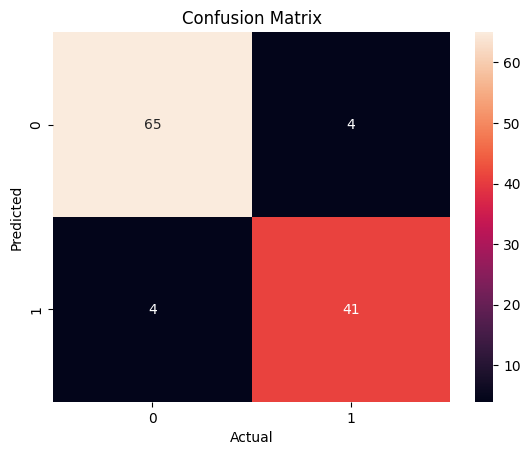

In [17]:
matrix = confusion_matrix(Y_test, Y_pred )
sns.heatmap(matrix, annot=True)

plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig("outputs/datasets/charts/models/log_regression.jpg")

The above matrix shows the performance of our model on a set of test data for which the true values are present. The conclusion that can be drawn from the above matrix are as follows : 

1. There were a total of 64 outcomes that were correctly classified as class 0 (That is class Benign) i.e. TNs = 65
2. There were a total of 5 outcomes that were correctly classified as class 1 (That is class Maligant) i.e. FNs = 4
3. There were 4 outcomes that were incorrectly predicted as class 0 (class Benign) i.e. FPs = 2 
4. There were a total of 41 outcomes that were incorrectly predicted as (class Maligant) i.e. TPs = 43

**II. Classification Report**

In [18]:
print(classification_report(Y_test, Y_pred))
plt.savefig("outputs/datasets/charts/models/log_regression_report.jpg")

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.91      0.91      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



<Figure size 640x480 with 0 Axes>

### II. Random Forest Classifier 

In [19]:
assert X_train.shape[0] == Y_train.shape[0]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
Y_pred = RFC_model.predict(X_test)

In [22]:
metrics.accuracy_score(Y_test,Y_pred)

0.9473684210526315

In [23]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)

0.22941573387056177


At this state , the accuracy of the model without any hyperparameter tunings were recorded.

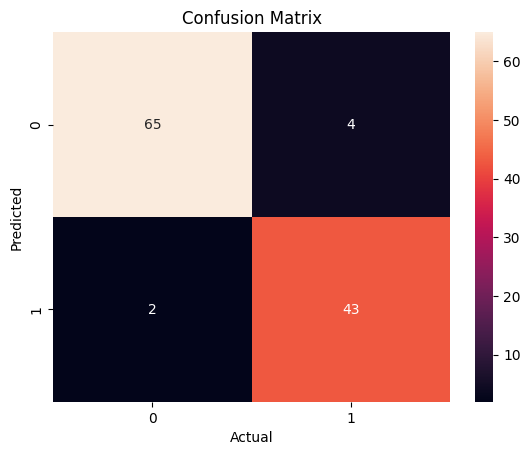

In [24]:
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot=True,)

plt.title("Confusion Matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig("outputs/datasets/charts/models/random_forest.jpg")

The conclusion that can be drawn from the above matrix are as follows :

1. There were a total of 64 outcomes that were correctly classified as class 0 (That is class Benign) i.e. TNs = 65
2. There were a total of 5 outcomes that were correctly classified as class 1 (That is class Maligant) i.e. FNs = 4
3. There were 4 outcomes that were incorrectly predicted as class 0 (class Benign) i.e. FPs = 3
4. There were a total of 41 outcomes that were incorrectly predicted as (class Maligant) i.e. TPs = 42

#### Displaying The Classification Report 

In [25]:
print(classification_report(Y_pred, Y_test))
plt.savefig("outputs/datasets/charts/models/randon_forest_report.jpg")

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



<Figure size 640x480 with 0 Axes>

### II. K Nearest Neighbors Classifier 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

KNNI = KNeighborsClassifier(n_neighbors = 3).fit(X_train, Y_train)
Y_pred = KNNI.predict(X_test)

metrics.accuracy_score(Y_test,Y_pred)

0.9035087719298246

In [28]:
print(classification_report(Y_pred, Y_test))
plt.savefig("outputs/datasets/charts/models/KNN_report.jpg")

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        70
           1       0.87      0.89      0.88        44

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



<Figure size 640x480 with 0 Axes>

Primarily, all these models were built without any hyperparameter tuning and feature selection methods.

Next Cross-validation, Hyper-parameter Tuning, Feature Selection and Building the final model